# Applying machine learning techniques and verifying f-measure in a developer database using R.

Required Packages:

In [2]:
library(RWeka)
library(e1071)
library(gmodels)
library(caret)
library(irr)
library(randomForest)



Before applying machine learning techniques to our database to find the best model, we need to know how to analyze the efficiency of our model.

To analyze this efficiency we first need to understand what a confusion matrix is, it is a table that indicates errors and hits of your model compared to the expected result (test database).

True Positives: correct classification of the positive class;
False negatives: Error where the model predicted the negative class when the expected value was positive class;
False positives: Error where the model predicted the Positive class when the expected value was Negative class;
True Negatives: Correct classification of the Negative class.

After applying the confusion matrix it is possible to calculate evaluation metrics.
We will use the F-measure which is the harmonic mean between precision and recall and indicates the overall quality of my model, the higher the F-measure the better.

We will create the functions to calculate the required metrics:

In [3]:
# Precision
precision <- function(tp, fp){
  
  precision <- tp/(tp+fp)
  
  return(precision)
}

Precision is calculated by the number of True Positives divided by the sum of True Positives and False positives.

In [4]:
# Recall
recall <- function(tp, fn){
  
  recall <- tp/(tp+fn)
  
  return(recall)
}

Recall is calculated as the number of True Positives divided by the sum of True Positives and False negatives.

In [5]:
# F-measure
f_measure <- function(tp, fp, fn){
  
  f_measure <- (2*precision(tp,fp)*recall(tp,fn))/(recall(tp,fn) + precision(tp, fp))
  
  return(f_measure)
}

F-measure is calculated with the number of True positives, False positives and False negatives, for this calculation to calculate precision and recall. With this calculation we will have a good idea of the performance of our model.

In [6]:
measures <- function(test, pred){
  
  true_positive <- 0
  true_negative <- 0
  false_positive <- 0
  false_negative <- 0
  
  for(i in 1:length(pred)){
    if(test[i] == TRUE && pred[i] == TRUE){
      true_positive <- true_positive + 1
    }else if(test[i] == FALSE && pred[i] == FALSE){
      true_negative <- true_negative + 1
    }else if(test[i] == FALSE && pred[i] == TRUE){
      false_negative <- false_negative + 1
    }else if(test[i] == TRUE && pred[i] == FALSE){
      false_positive <- false_positive + 1
    }
  }
  
  measures <- c(precision(true_positive,false_positive), 
                recall(true_positive,false_negative), 
                f_measure(true_positive,false_positive,false_negative))
  
  return(measures)
}

The Measures function was created to make the confusion matrix and with the confusion matrix data apply precision, recall and f-measure evaluation techniques.

After that, we will use known algorithms to create our model:

J48;
Naive Bayes;
SVM;
OneR;
JRip;
RandomForest; 
SMO.

We create functions for each one by creating their model and analyzing the metrics.

In [7]:
executeJ48 <- function(dataset, folds){
  results <- lapply(folds, function(x) {
    train <- dataset[-x, ]
    test <- dataset[x, ]
    model <- J48(train$Smell~ ., data = train)
    pred <- predict(model, test)
    
    results <- measures(test$Smell, pred)
    
    return(results)
  })
  
}

executeNaiveBayes <- function(dataset, folds){
  results <- lapply(folds, function(x) {
    train <- dataset[-x, ]
    test <- dataset[x, ]
    model <- naiveBayes(train, train$Smell, laplace = 1)
    pred <- predict(model, test)
    
    results <- measures(test$Smell, pred)
    
    return(results)
  })
  
}

executeSVM <- function(dataset, folds){
  results <- lapply(folds, function(x) {
    train <- dataset[-x, ]
    test <- dataset[x, ]
    model <- svm(train$Smell~ ., data = train)
    pred <- predict(model, test)
    
    results <- measures(test$Smell, pred)
    
    return(results)
  })
  
}

executeOneR <- function(dataset, folds){
  results <- lapply(folds, function(x) {
    train <- dataset[-x, ]
    test <- dataset[x, ]
    model <- OneR(train$Smell~ ., data = train)
    pred <- predict(model, test)
    
    results <- measures(test$Smell, pred)
    
    return(results)
  })
  
}

executeJRip <- function(dataset, folds){
  results <- lapply(folds, function(x) {
    train <- dataset[-x, ]
    test <- dataset[x, ]
    model <- JRip(train$Smell~ ., data = train)
    pred <- predict(model, test)
    
    results <- measures(test$Smell, pred)
    
    return(results)
  })
  
}

executeRandomForest <- function(dataset, folds){
  results <- lapply(folds, function(x) {
    train <- dataset[-x, ]
    test <- dataset[x, ]
    model <- randomForest(train$Smell~ ., data = train)
    pred <- predict(model, test)
    
    results <- measures(test$Smell, pred)
    
    return(results)
  })
}

executeSMO <- function(dataset, folds){
  results <- lapply(folds, function(x) {
    train <- dataset[-x, ]
    test <- dataset[x, ]
    model <- SMO(train$Smell~ ., data = train)
    pred <- predict(model, test)
    
    results <- measures(test$Smell, pred)
    
    return(results)
  })
}


After creating the functions and metrics needed to build and analyze our predictive machine learning models, we just need a real-life database to test everything.

On this basis we have cases of good developers and not good developers, so we will say that this result is a factor containing true or false value.
For validation we will use cross-validation in the variable folds. It is a technique for evaluating a model's ability to generate from a data set, so we will separate our base with this function and perform it according to the function.

In [8]:
#load database
dataset = read.csv(paste("Developers_database/FE/FE - 1.csv",sep=""))

dataset$Smell <- factor(dataset$Smell)

dataset$Smell

folds <- createFolds(dataset$Smell, k=5)

folds



[1] FALSE FALSE FALSE TRUE  FALSE TRUE  FALSE TRUE  TRUE  TRUE  FALSE TRUE 
[13] TRUE  FALSE TRUE 
Levels: FALSE TRUE

$Fold1
[1] 5 6 7 9

$Fold2
[1] 11 12

$Fold3
[1]  1 13 14 15

$Fold4
[1]  2  8 10

$Fold5
[1] 3 4

Now just apply the functions created above and analyze the data :)

In [9]:
resultsJ48 <- executeJ48(dataset, folds)
results <- rowMeans(as.data.frame(resultsJ48), na.rm = TRUE)
    
resultsNaiveBayes <- executeNaiveBayes(dataset, folds)
results <- rbind(results, rowMeans(as.data.frame(resultsNaiveBayes), na.rm = TRUE) ) 
    
resultsSVM <- executeSVM(dataset, folds)
results <- rbind(results, rowMeans(as.data.frame(resultsSVM), na.rm = TRUE)) 
    
resultsOneR <- executeOneR(dataset, folds)
results <- rbind(results, rowMeans(as.data.frame(resultsOneR), na.rm = TRUE)) 
    
resultsJRip <- executeJRip(dataset, folds)
results <- rbind(results, rowMeans(as.data.frame(resultsJRip), na.rm = TRUE)) 
    
resultsRandomForest <- executeRandomForest(dataset, folds)
results <- rbind(results, rowMeans(as.data.frame(resultsRandomForest), na.rm = TRUE)) 
    
resultsSMO <- executeSMO(dataset, folds)
results <- rbind(results, rowMeans(as.data.frame(resultsSMO), na.rm = TRUE)) 

rownames(results) <- c("J48", "NaiveBayes", "SVM", "oneR", "JRip", "RandomForest","SMO")
colnames(results) <- c("Precision", "Recall", "F-measure")

results




Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”

,Precision,Recall,F-measure
J48,0.4,0.5000000,0.6111111
NaiveBayes,0.7,0.9166667,0.8666667
SVM,0.6,0.5000000,0.7777778
oneR,0.6,0.3750000,0.6666667
JRip,0.6,0.3750000,0.6666667
RandomForest,0.4,0.5555556,0.9000000
SMO,0.6,0.5000000,0.7777778


Seeing the values we get a sense of how the model is behaving. As our focus is F-measure analysis we will create a graph showing the performance of the algorithms using this metric as focus.

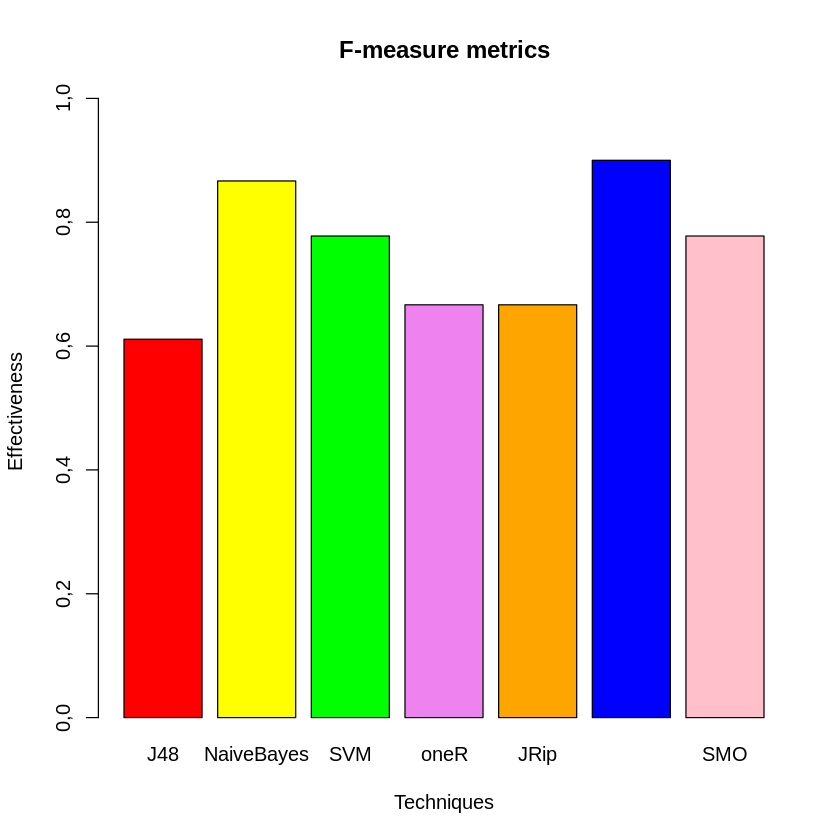

In [10]:
barplot(results[,3], 
        main="F-measure metrics",
        ylab="Effectiveness ",
        xlab="Techniques", 
        col=c("red", "yellow", "green", "violet", "orange", "blue", "pink"), 
        ylim = c(0, 1),
        beside=TRUE)

So far we have done an evaluation of the models using a very small and small scale base to get a basic notion of what it would look like. Now let's import several developer bases and do this on a large scale to get a better sense of how we will evaluate the created models and their effectiveness.

In [17]:
techniques <- c("J48", "NaiveBayes", "SVM", "oneR", "JRip", "RandomForest", "SMO")

smells <- c("FE", "DCL", "GC", "II","LM", "MC", "MM", "PO","RB","SG")

developers <- data.frame(c(1, 5, 6, 9, 55, 58, 60, 84, 97, 99, 101, 103),
                         c(2, 17, 18, 19, 21, 22, 27, 30, 77, 86, 93, 104),
                         c(1, 9, 13, 15, 16, 61, 62, 66, 84, 94, 102, 103),
                         c(2, 7, 21, 22, 24, 25, 28, 86, 104, 110, 111, 124),
                         c(41, 42, 43, 45, 46, 47, 49, 51, 64, 74, 81, 95),
                         c(5, 6, 10, 52, 53, 55, 58, 60, 91, 97, 99, 101),
                         c(8, 11, 39, 40, 41, 42, 43, 45, 46, 47, 74, 81),
                         c(46, 47, 49, 51, 52, 53, 64, 74, 91, 95, 105, 109),
                         c(13, 15, 16, 17, 18, 19, 30, 61, 94, 102, 111, 112),
                         c(5, 49, 51, 52, 53, 55, 56, 64, 91, 95, 99, 105))

colnames(developers) <- smells

list_of_results <- list()

for(j in 1:10){
  
  path <- paste("Developers_database/",colnames(developers)[j],"/",colnames(developers)[j]," - ",sep="")
  
  results <- data.frame(0,0,0, 0, 0,0,0)
  
  
  for(q in 1:12){
    
    dev_path <- paste(path,developers[q,j],".csv",sep="")  
    dataset <- read.csv(dev_path, stringsAsFactors = FALSE)
    
    dataset$Smell <- factor(dataset$Smell)
    
    set.seed(3)
    folds <- createFolds(dataset$Smell, k =5)
    
    resultsJ48 <- executeJ48(dataset, folds)
    partial_results <- rowMeans(as.data.frame(resultsJ48), na.rm = TRUE)
    
    resultsNaiveBayes <- executeNaiveBayes(dataset, folds)
    partial_results <- rbind(partial_results, rowMeans(as.data.frame(resultsNaiveBayes), na.rm = TRUE) ) 
    
    resultsSVM <- executeSVM(dataset, folds)
    partial_results <- rbind(partial_results, rowMeans(as.data.frame(resultsSVM), na.rm = TRUE)) 
    
    resultsOneR <- executeOneR(dataset, folds)
    partial_results <- rbind(partial_results, rowMeans(as.data.frame(resultsOneR), na.rm = TRUE)) 
    
    resultsJRip <- executeJRip(dataset, folds)
    partial_results <- rbind(partial_results, rowMeans(as.data.frame(resultsJRip), na.rm = TRUE)) 
    
    resultsRandomForest <- executeRandomForest(dataset, folds)
    partial_results <- rbind(partial_results, rowMeans(as.data.frame(resultsRandomForest), na.rm = TRUE)) 
    
    resultsSMO <- executeSMO(dataset, folds)
    partial_results <- rbind(partial_results, rowMeans(as.data.frame(resultsSMO), na.rm = TRUE)) 
    
    rownames(partial_results) <- c("J48", "NaiveBayes", "SVM", "oneR", "JRip", "RandomForest","SMO")
    colnames(partial_results) <- c("Precision", "Recall", "F-measure")
    
    
    results <- rbind(results, partial_results[,3])
  }
  
  results <- results[-1,]
  rownames(results) <- developers[ ,j]
  colnames(results) <- techniques
  results[,] <- lapply(results,function(x){ x[is.nan(x)]<-0;return(x)})
  
  list_of_results[[j]] <- results
  
}

for(smell in 1:10){
  print(smells[smell])
  
  print(list_of_results[[smell]])
}




Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ...

“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountClassBase’ and ‘CountDeclClassMethod’ and ‘CountDeclMethodPrivate’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountClassBase’ and ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot 

“Variable(s) ‘BCountDeclMethodPrivate’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘BCountDeclMethodPrivate’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘BCountDeclMethodPrivate’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘BCountDeclMethodPrivate’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning messag

“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in

[1] "FE"
          J48 NaiveBayes       SVM      oneR      JRip RandomForest       SMO
1   0,6000000  0,8666667 0,6916667 0,6916667 0,5833333    0,6555556 0,7266667
5   0,6666667  0,6666667 0,6666667 0,6666667 1,0000000    0,6666667 0,6888889
6   0,6933333  0,5666667 0,8514286 0,6500000 0,8247619    0,7200000 0,7800000
9   0,6666667  0,6666667 0,6666667 0,0000000 0,0000000    0,7500000 0,5583333
55  0,6555556  0,6555556 0,7466667 0,6266667 0,7466667    0,6000000 0,6111111
58  0,5000000  0,5555556 0,6266667 0,7000000 0,4500000    0,6583333 0,7333333
60  0,7500000  0,4000000 0,0000000 0,6111111 0,8333333    0,8333333 0,4000000
84  0,0000000  0,5000000 0,0000000 1,0000000 0,0000000    0,6666667 0,5000000
97  0,8000000  0,7600000 0,8000000 0,8000000 0,8000000    0,6800000 0,7800000
99  0,0000000  0,6333333 0,0000000 0,8333333 0,0000000    0,8333333 0,5833333
101 1,0000000  0,6666667 0,6666667 1,0000000 0,6666667    0,8333333 0,0000000
103 0,7111111  0,7600000 0,6600000 0,6555556 0,7750000 

In [18]:


results_mean <-     matrix(c(mean(list_of_results[[1]]$J48), 
                             mean(list_of_results[[1]]$NaiveBayes), 
                             mean(list_of_results[[1]]$SVM), 
                             mean(list_of_results[[1]]$oneR), 
                             mean(list_of_results[[1]]$JRip), 
                             mean(list_of_results[[1]]$RandomForest), 
                             mean(list_of_results[[1]]$SMO)), 
                           nrow = 1,
                           ncol = 7)

for(smell in 2:10){
  results_mean <- rbind(results_mean, c(mean(list_of_results[[smell]]$J48), 
                                        mean(list_of_results[[smell]]$NaiveBayes), 
                                        mean(list_of_results[[smell]]$SVM), 
                                        mean(list_of_results[[smell]]$oneR), 
                                        mean(list_of_results[[smell]]$JRip), 
                                        mean(list_of_results[[smell]]$RandomForest), 
                                        mean(list_of_results[[smell]]$SMO)))
}

results_mean


colnames(results_mean) <- techniques
rownames(results_mean) <- colnames(developers)
results_mean <- t(results_mean)
results_mean




"0,5869444","0,6414815","0,5313690","0,6862500","0,5566468","0,7199074","0,5990278"
"0,8476190","0,8282870","0,5694974","0,7350265","0,8167196","0,8891270","0,8702579"
"0,8101852","0,7717593","0,3703704","0,7562500","0,5375000","0,7541667","0,8240741"
"0,6430556","0,6334722","0,3773611","0,5938426","0,5893981","0,6305556","0,6731944"
"0,7805159","0,7726653","0,7607738","0,7264418","0,7369974","0,8168783","0,6613757"
"0,5990079","0,5606283","0,5188492","0,5927579","0,5588294","0,5503307","0,5142196"
"0,6752315","0,6540741","0,3077778","0,3597222","0,4981481","0,6189815","0,7082407"
"0,7158796","0,7332870","0,5869709","0,6642593","0,4638889","0,6017593","0,7734722"
"0,7416204","0,6705556","0,5188690","0,6868981","0,5905556","0,7698611","0,6632870"
"0,5644246","0,6240741","0,4349802","0,6814616","0,4274339","0,7417394","0,7451190"


,FE,DCL,GC,II,LM,MC,MM,PO,RB,SG
J48,"0,5869444","0,8476190","0,8101852","0,6430556","0,7805159","0,5990079","0,6752315","0,7158796","0,7416204","0,5644246"
NaiveBayes,"0,6414815","0,8282870","0,7717593","0,6334722","0,7726653","0,5606283","0,6540741","0,7332870","0,6705556","0,6240741"
SVM,"0,5313690","0,5694974","0,3703704","0,3773611","0,7607738","0,5188492","0,3077778","0,5869709","0,5188690","0,4349802"
oneR,"0,6862500","0,7350265","0,7562500","0,5938426","0,7264418","0,5927579","0,3597222","0,6642593","0,6868981","0,6814616"
JRip,"0,5566468","0,8167196","0,5375000","0,5893981","0,7369974","0,5588294","0,4981481","0,4638889","0,5905556","0,4274339"
RandomForest,"0,7199074","0,8891270","0,7541667","0,6305556","0,8168783","0,5503307","0,6189815","0,6017593","0,7698611","0,7417394"
SMO,"0,5990278","0,8702579","0,8240741","0,6731944","0,6613757","0,5142196","0,7082407","0,7734722","0,6632870","0,7451190"


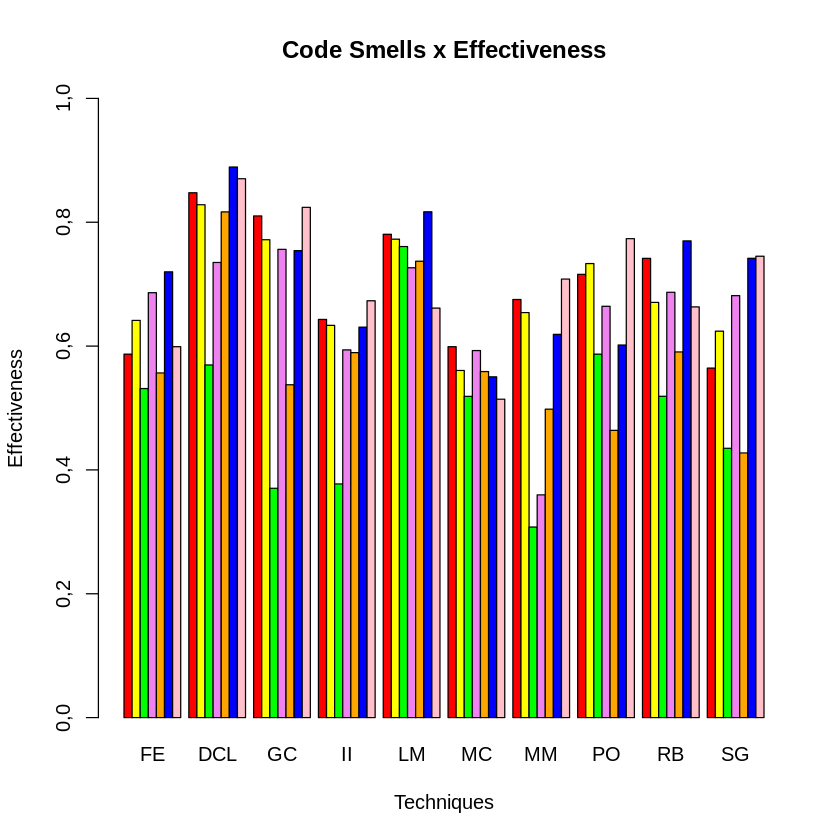

In [19]:
barplot(results_mean, 
        main="Code Smells x Effectiveness",
        ylab="Effectiveness",
        xlab="Techniques", 
        col=c("red", "yellow", "green", "violet", "orange", "blue", "pink"), 
        ylim = c(0, 1),
        #legend = rownames(results_mean), 
        beside=TRUE)